# Example

In [5]:
# ! pip install matplotlib numpy scikit-learn pandas

In [7]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
import pandas as pd 
import numpy as np
from sklearn.cluster import HDBSCAN

In [8]:
bboxes = np.array([
    [0, 0, .2, .2],
    [.22, 0, .42, .2],
    [0, .22, .2, .4],
    [0, .6, .2, .8],
    [0.22, .6, .4, .8],
    [0.6, .8, .8, 1],
    [0.8, .0, 1, 0.2],
    [0.8, .22, 1, 0.42],
])

x1, y1, x2, y2 = bboxes.T  # unpack columns

# compute pairwise start ends of X
start_x = np.maximum(x1[:, None], x1[None, :])
end_x = np.minimum(x2[:, None], x2[None, :])
dx = np.clip(start_x - end_x, 0, None)

# compute pairwise start ends of Y
start_y = np.maximum(y1[:, None], y1[None, :])
end_y = np.minimum(y2[:, None], y2[None, :])
dy = np.clip(start_y - end_y, 0, None)

# # manhattan
# D1 = dx + dy
# euclidean
D = np.hypot(dx, dy)
A = ((1-dx)*(1-dy))

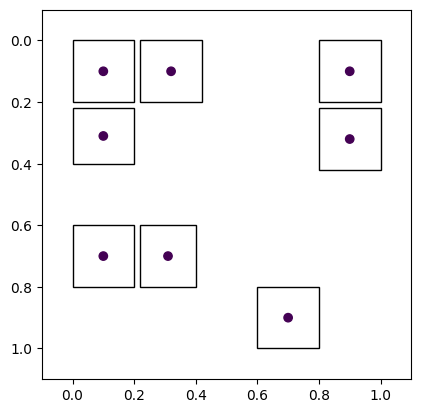

In [9]:
fig, ax = plt.subplots()
for x0, y0, x1, y1 in bboxes:
    width = x1 - x0
    height = y1 - y0
    rect = Rectangle((x0, y0), width, height, fill=False)
    ax.add_patch(rect)

plt.scatter(((bboxes[:,0]+ bboxes[:,2]) / 2), ((bboxes[:,1]+ bboxes[:,3]) / 2), c= np.ones(len(bboxes)))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal', 'box')
plt.gca().invert_yaxis();

### HDBSCAN

0.01999999999999999
0.020000000000000018


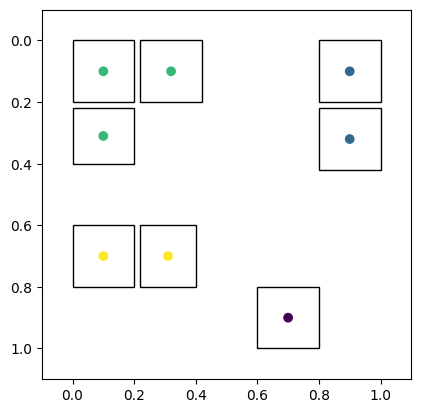

In [11]:
D_eps = np.quantile(D[np.triu_indices_from(D,1)], 0.05)
print(D_eps)

D2 = 1-A
D2_eps = np.quantile(D2[np.triu_indices_from(D2,1)], 0.05)
print(D2_eps)

clusterer = HDBSCAN(
  metric='precomputed',
  min_cluster_size=2,
  min_samples=1,
  cluster_selection_epsilon=D_eps,
  cluster_selection_method='eom'
)

labels_ = clusterer.fit_predict(D)
fig, ax = plt.subplots()
for x0, y0, x1, y1 in bboxes:
    width = x1 - x0
    height = y1 - y0
    rect = Rectangle((x0, y0), width, height, fill=False)
    ax.add_patch(rect)

plt.scatter(((bboxes[:,0]+ bboxes[:,2]) / 2), ((bboxes[:,1]+ bboxes[:,3]) / 2), c= labels_)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal', 'box')
plt.gca().invert_yaxis();
